### Dhruv Patel 
17162121014 BDA Sem-7

## Assignment 1: Problem Statement

Given subset of Amazon_Transaction data for year 2019.Recommend the most commonly products that were purchased together, if user has given some input product (one of the products that he/she has purchased).  

To limit the scope, you can target only a city say San Francisco and not the entire USA


In [661]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [662]:
df = pd.read_csv("amazon_transaction.csv")  ##read data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [663]:
df.columns.tolist()  # col list

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [664]:
df["Product"].value_counts()  ## value counts

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [665]:
df = df.dropna() ## drop na values

In [666]:
df["Quantity Ordered"].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

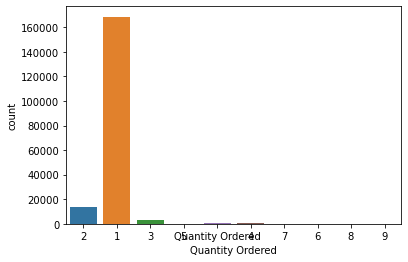

In [667]:
sns.countplot(x=df["Quantity Ordered"],data=df)  ## majoritily of orders are unique only

In [668]:
len(df[df["Quantity Ordered"]=="Quantity Ordered"])  ## we have 355 missing or text data in our order quantitiy columns

355

In [669]:
# handling the missing values in Quantity ordered

In [670]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 14.9+ MB


In [672]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [673]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,18,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [674]:
len(df)

186305

In [675]:
# df["Order ID"].nunique()  #  unique order

In [676]:
# merged_order = df.groupby(by="Order ID")

In [677]:
# len(merged_order)

In [678]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [679]:
df.Product.value_counts()  # now our order has been merged

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [680]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [681]:
cols = df.columns  # col list

In [682]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [683]:
df["Order ID"].value_counts()  ### we see that Order ID name has come up 355 times, we need to drop that

Order ID    355
160873        5
165665        4
277875        4
193511        4
           ... 
238844        1
259535        1
280071        1
201330        1
319494        1
Name: Order ID, Length: 178438, dtype: int64

In [684]:
name_index = df[df["Order ID"]=="Order ID"] ## get df where Order Id has value of "Order Id"


In [685]:
row_to_drop = name_index.index.tolist()  # select index of such rows

In [686]:
df.drop(index=row_to_drop,inplace=True)  # drop that index

In [687]:
df["Order Date"].value_counts()  ## data cleaned

12/15/2019 20:16    8
10/30/2019 21:28    7
12/11/2019 13:24    7
4/2/2019 13:24      7
12/18/2019 11:32    6
                   ..
7/8/2019 13:25      1
5/5/2019 9:33       1
12/19/2019 20:51    1
12/1/2019 11:47     1
3/13/2019 2:27      1
Name: Order Date, Length: 142395, dtype: int64

In [688]:
## now we have cleaned data ,we will now handle datatypes

In [689]:
df["Order ID"]=df["Order ID"].astype("int32")

In [690]:
cols

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [691]:
df["Quantity Ordered"]=df["Quantity Ordered"].astype("int32")

In [692]:
df["Price Each"]=df["Price Each"].astype("float64")


In [693]:
df.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [694]:
pd.to_datetime(df["Order Date"])  ## handling dates

0        2019-04-19 08:46:00
1        2019-04-07 22:30:00
2        2019-04-12 14:38:00
3        2019-04-12 14:38:00
4        2019-04-30 09:27:00
                 ...        
186844   2019-09-17 20:56:00
186845   2019-09-01 16:00:00
186846   2019-09-23 07:39:00
186847   2019-09-19 17:30:00
186848   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [695]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [696]:
df.describe() # now we are getting good description

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [697]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [698]:
# d2 =df.groupby("Order ID").head()

In [699]:
# d2 = df.groupby(by = "Purchase Address")

In [700]:
sf_df = df[df['Purchase Address'].str.contains("San Francisco")]  ## getting only city san francisco data

In [701]:
sf_df=sf_df.reset_index()  ## rearranging index

In [702]:
sf_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,5,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
1,8,176565,Macbook Pro Laptop,1,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
2,16,176573,USB-C Charging Cable,1,11.95,4/27/2019 18:41,"214 Chestnut St, San Francisco, CA 94016"
3,28,176584,Flatscreen TV,1,300.00,4/24/2019 20:39,"936 Church St, San Francisco, CA 94016"
4,31,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"


In [703]:
sf_df.drop(columns="index")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
1,176565,Macbook Pro Laptop,1,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
2,176573,USB-C Charging Cable,1,11.95,4/27/2019 18:41,"214 Chestnut St, San Francisco, CA 94016"
3,176584,Flatscreen TV,1,300.00,4/24/2019 20:39,"936 Church St, San Francisco, CA 94016"
4,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
44727,259352,USB-C Charging Cable,1,11.95,9/7/2019 15:49,"976 Forest St, San Francisco, CA 94016"
44728,259354,iPhone,1,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
44729,259355,iPhone,1,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
44730,259356,34in Ultrawide Monitor,1,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [704]:
len(sf_df)-sf_df["Order ID"].nunique()  ## total repeated orders
print()
sf_df["Order ID"].nunique()  ## unique order

1834

42898

In [705]:
most_frequent_product =sf_df["Product"].value_counts()  ## get most frequently purchased items
most_frequent_product

USB-C Charging Cable          5368
Lightning Charging Cable      5174
AAA Batteries (4-pack)        4932
AA Batteries (4-pack)         4903
Wired Headphones              4592
Apple Airpods Headphones      3705
Bose SoundSport Headphones    3287
27in FHD Monitor              1803
iPhone                        1660
27in 4K Gaming Monitor        1456
34in Ultrawide Monitor        1442
Google Phone                  1355
Flatscreen TV                 1149
Macbook Pro Laptop            1134
20in Monitor                   993
ThinkPad Laptop                963
Vareebadd Phone                493
LG Washing Machine             180
LG Dryer                       143
Name: Product, dtype: int64

<Figure size 1080x504 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

Text(0, 10, '5368.00')

Text(0, 10, '1134.00')

Text(0, 10, '1149.00')

Text(0, 10, '4932.00')

Text(0, 10, '1355.00')

Text(0, 10, '4592.00')

Text(0, 10, '143.00')

Text(0, 10, '1660.00')

Text(0, 10, '3287.00')

Text(0, 10, '4903.00')

Text(0, 10, '5174.00')

Text(0, 10, '493.00')

Text(0, 10, '3705.00')

Text(0, 10, '993.00')

Text(0, 10, '1442.00')

Text(0, 10, '180.00')

Text(0, 10, '1456.00')

Text(0, 10, '963.00')

Text(0, 10, '1803.00')

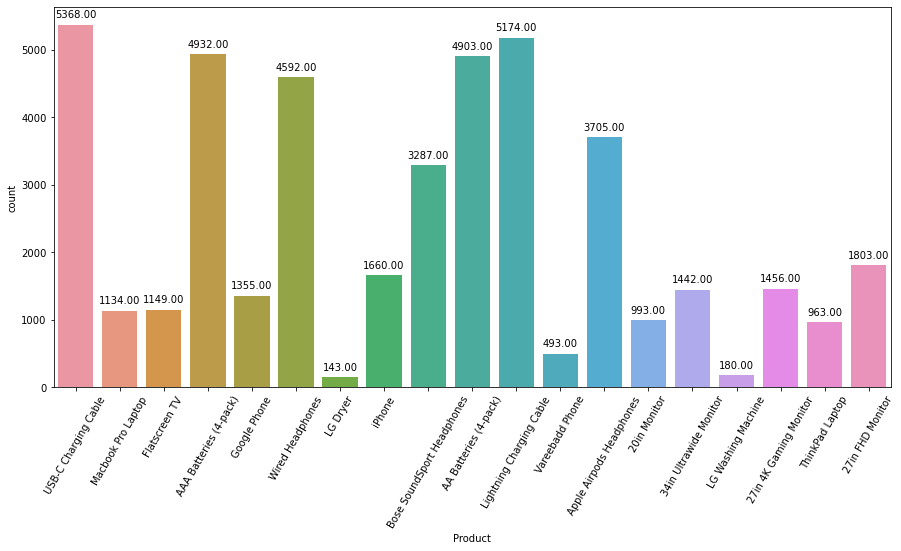

In [706]:
plt.figure(figsize=[15,7])
splot=sns.countplot(sf_df["Product"])  # count distribution
plt.xticks(rotation=60)

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [707]:
sf_df["Order Date"].nunique() ## unique values

40554

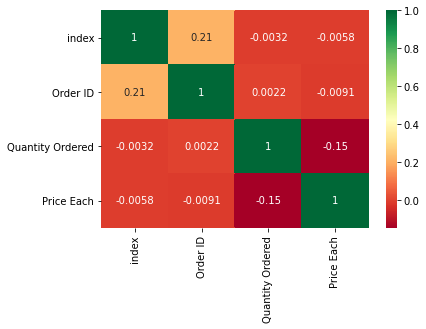

In [708]:
sns.heatmap(sf_df.corr(),cmap="RdYlGn",annot=True)  # correlation plot

In [709]:
# sns.distplot(sf_df["Price Each"],hist=True)

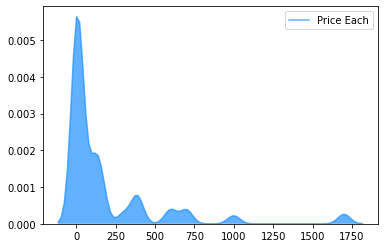

In [710]:
sns.kdeplot(sf_df["Price Each"],shade=True,color="dodgerblue", alpha=.7)  ## distribution of prices

<Figure size 1080x504 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

Text(0, 10, '40608.00')

Text(0, 10, '3156.00')

Text(0, 10, '682.00')

Text(0, 10, '196.00')

Text(0, 10, '63.00')

Text(0, 10, '20.00')

Text(0, 10, '4.00')

Text(0, 10, '1.00')

Text(0, 10, '2.00')

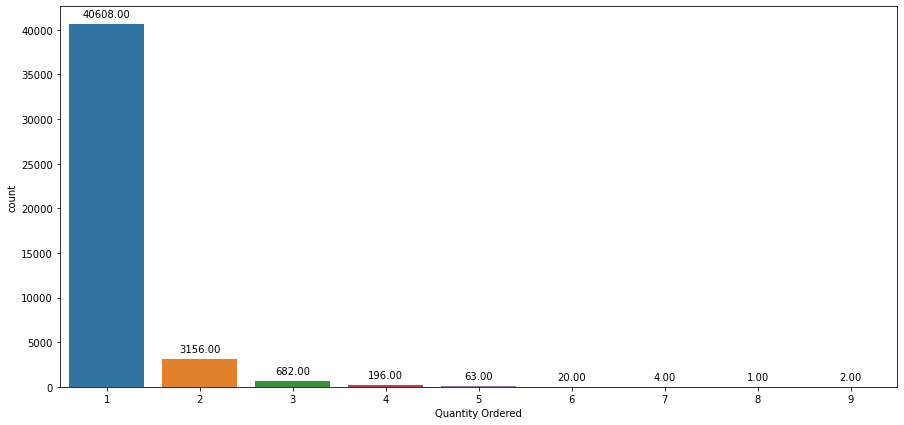

In [711]:
plt.figure(figsize=[15,7])
splot=sns.countplot(sf_df["Quantity Ordered"])
plt.xticks(rotation=0)

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [712]:
sf_df["Price Each"].mean()
print()
sf_df["Price Each"].median()

183.57019002056694

14.95

<Figure size 720x720 with 0 Axes>

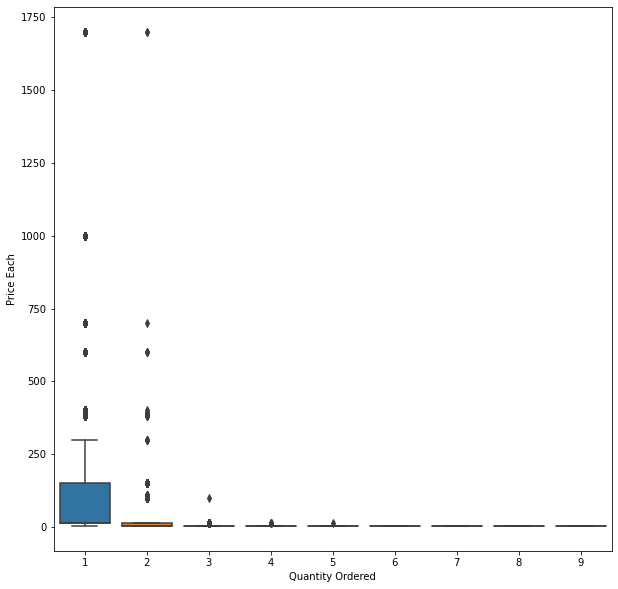

In [713]:
plt.figure(figsize=[10,10])
sns.boxplot(x="Quantity Ordered",y="Price Each",data=sf_df)
# sns.swarmplot(x="Quantity Ordered",y="Price Each",data=sf_df)
plt.show()

In [714]:
## building Algo for Recommender system

In [715]:

most_frequent_product

USB-C Charging Cable          5368
Lightning Charging Cable      5174
AAA Batteries (4-pack)        4932
AA Batteries (4-pack)         4903
Wired Headphones              4592
Apple Airpods Headphones      3705
Bose SoundSport Headphones    3287
27in FHD Monitor              1803
iPhone                        1660
27in 4K Gaming Monitor        1456
34in Ultrawide Monitor        1442
Google Phone                  1355
Flatscreen TV                 1149
Macbook Pro Laptop            1134
20in Monitor                   993
ThinkPad Laptop                963
Vareebadd Phone                493
LG Washing Machine             180
LG Dryer                       143
Name: Product, dtype: int64

In [716]:
# here we are categorizing similiar category of items so that recommendation becomes easy
mobiles_and_accessories = ["USB-C Charging Cable",
                           "Lightning Charging Cable",
                           "Wired Headphones",
                           "Apple Airpods Headphones",
                           "iPhone",
                           "Bose SoundSport Headphones",
                           "Google Phone",
                           "Vareebadd Phone" ]

In [717]:
electronics =["AAA Batteries (4-pack)",
              "AA Batteries (4-pack)",
              "LG Washing Machine",
              "LG Dryer"
              
             ]

In [718]:
tv_and_monitors=[
                "27in FHD Monitor",
                "27in 4K Gaming Monitor",
                "34in Ultrawide Monitor",
                "Flatscreen TV",
                "Macbook Pro Laptop",
                "20in Monitor",
                "ThinkPad Laptop"
]

In [719]:
most_frequent_product.index.tolist()

['USB-C Charging Cable',
 'Lightning Charging Cable',
 'AAA Batteries (4-pack)',
 'AA Batteries (4-pack)',
 'Wired Headphones',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 '27in FHD Monitor',
 'iPhone',
 '27in 4K Gaming Monitor',
 '34in Ultrawide Monitor',
 'Google Phone',
 'Flatscreen TV',
 'Macbook Pro Laptop',
 '20in Monitor',
 'ThinkPad Laptop',
 'Vareebadd Phone',
 'LG Washing Machine',
 'LG Dryer']

In [720]:
df[df["Product"]=="AAA Batteries (4-pack)"]  # sample

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
19,176575,AAA Batteries (4-pack),1,2.99,4/27/2019 0:30,"433 Hill St, New York City, NY 10001"
27,176583,AAA Batteries (4-pack),2,2.99,4/20/2019 12:00,"146 Jackson St, Portland, OR 97035"
31,176586,AAA Batteries (4-pack),2,2.99,4/10/2019 17:00,"365 Center St, San Francisco, CA 94016"
44,176598,AAA Batteries (4-pack),2,2.99,4/21/2019 20:33,"294 Park St, San Francisco, CA 94016"
53,176607,AAA Batteries (4-pack),2,2.99,4/18/2019 12:11,"689 10th St, Boston, MA 02215"
...,...,...,...,...,...,...
186826,259336,AAA Batteries (4-pack),3,2.99,9/25/2019 0:13,"753 14th St, Boston, MA 02215"
186828,259338,AAA Batteries (4-pack),2,2.99,9/2/2019 21:29,"666 Lakeview St, Boston, MA 02215"
186834,259344,AAA Batteries (4-pack),2,2.99,9/10/2019 23:33,"721 Madison St, San Francisco, CA 94016"
186839,259349,AAA Batteries (4-pack),1,2.99,9/1/2019 22:14,"911 River St, Dallas, TX 75001"


In [721]:
product_list = most_frequent_product.index.tolist()

In [722]:
product_dict={}  ## creating dict of product items with their price
for i in range(len(product_list)):
#     price=df[df["Product"]== product_list[i]]["Price Each"][0]
#     product_dict[product_list[i]]:price
    price=df[df["Product"]== product_list[i]]["Price Each"].reset_index()["Price Each"][0]
    product_dict[product_list[i]]=price
    
    


In [723]:
product_dict

{'USB-C Charging Cable': 11.95,
 'Lightning Charging Cable': 14.95,
 'AAA Batteries (4-pack)': 2.99,
 'AA Batteries (4-pack)': 3.84,
 'Wired Headphones': 11.99,
 'Apple Airpods Headphones': 150.0,
 'Bose SoundSport Headphones': 99.99,
 '27in FHD Monitor': 149.99,
 'iPhone': 700.0,
 '27in 4K Gaming Monitor': 389.99,
 '34in Ultrawide Monitor': 379.99,
 'Google Phone': 600.0,
 'Flatscreen TV': 300.0,
 'Macbook Pro Laptop': 1700.0,
 '20in Monitor': 109.99,
 'ThinkPad Laptop': 999.99,
 'Vareebadd Phone': 400.0,
 'LG Washing Machine': 600.0,
 'LG Dryer': 600.0}

In [724]:
product_df = pd.DataFrame(data=product_dict.items(),columns=["Product","Price"])

In [725]:
product_df  #final DF

,Product,Price
0,USB-C Charging Cable,11.95
1,Lightning Charging Cable,14.95
2,AAA Batteries (4-pack),2.99
3,AA Batteries (4-pack),3.84
4,Wired Headphones,11.99
5,Apple Airpods Headphones,150.00
6,Bose SoundSport Headphones,99.99
7,27in FHD Monitor,149.99
8,iPhone,700.00
9,27in 4K Gaming Monitor,389.99


In [726]:
## recommender algo

def recommender(user_input):
    """
    get recommendation based on product input
    
    input params: valid product name
    
    output: DataFrame containing product name and respective price that are recommended
    """
    
    if user_input in mobiles_and_accessories:
        
        print("People Who purchased this also purchased this !!!!")
        recommender_dict = {}
        for i in range(len(mobiles_and_accessories)):
            price=float(product_df[product_df["Product"]==mobiles_and_accessories[i]].Price)
            product_name = mobiles_and_accessories[i]
            
            recommender_dict[product_name]=price
                    
        recommendation_df = pd.DataFrame(data=recommender_dict.items(),columns=["Product","Price"])
        return recommendation_df
    
    elif user_input in electronics:
        
        print("People Who purchased this also purchased this !!!!")
        recommender_dict = {}
        for i in range(len(electronics)):
            price=float(product_df[product_df["Product"]==electronics[i]].Price)
            product_name = electronics[i]
            
            recommender_dict[product_name]=price
                    
        recommendation_df = pd.DataFrame(data=recommender_dict.items(),columns=["Product","Price"])
        return recommendation_df
    
    elif user_input in tv_and_monitors:
        
        print("People Who purchased this also purchased this !!!!")
        recommender_dict = {}
        for i in range(len(tv_and_monitors)):
            price=float(product_df[product_df["Product"]==tv_and_monitors[i]].Price)
            product_name = tv_and_monitors[i]
            
            recommender_dict[product_name]=price
                    
        recommendation_df = pd.DataFrame(data=recommender_dict.items(),columns=["Product","Price"])
        return recommendation_df
            

In [728]:
user_input = "LG Dryer"
recommendation =recommender(user_input)
recommendation

People Who purchased this also purchased this !!!!


,Product,Price
0,AAA Batteries (4-pack),2.99
1,AA Batteries (4-pack),3.84
2,LG Washing Machine,600.00
3,LG Dryer,600.00


In [729]:
user_input = "iPhone"
recommendation =recommender(user_input)
recommendation

People Who purchased this also purchased this !!!!


,Product,Price
0,USB-C Charging Cable,11.95
1,Lightning Charging Cable,14.95
2,Wired Headphones,11.99
3,Apple Airpods Headphones,150.00
4,iPhone,700.00
5,Bose SoundSport Headphones,99.99
6,Google Phone,600.00
7,Vareebadd Phone,400.00


In [731]:
user_input = "Flatscreen TV"
recommendation =recommender(user_input)
recommendation

People Who purchased this also purchased this !!!!


,Product,Price
0,27in FHD Monitor,149.99
1,27in 4K Gaming Monitor,389.99
2,34in Ultrawide Monitor,379.99
3,Flatscreen TV,300.00
4,Macbook Pro Laptop,1700.00
5,20in Monitor,109.99
6,ThinkPad Laptop,999.99


In [ ]:
## thus we created a prototype of recommendation system which suggest product based on purchased product